<a href="https://colab.research.google.com/github/aunghlaingtun/geeky-projects-yun/blob/master/myassingment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Introducuion to Machine Learning Assignment

# Introduction

TensorFlow and Keras are powerful frameworks for developing deep learning models. Keras provides an intuitive, high-level API that simplifies building and training neural networks, making it accessible for various applications. In this Assignment, i  use Keras to construct a fully connected feedforward neural network designed for a classification problem.


In this Assignment, i aim to develop a fully-connected, feedforward neural network using Keras to classify weather data from the Ang Mo Kio area. The dataset includes various meteorological features such as temperature, wind speed, and rainfall measurements. Our goal is to classify days as either “rainy” or “non-rainy” based on these features.

To achieve this, i will follow a structured approach that includes data pre-processing, model definition, training, evaluation, and visualization of model performance. i will also fine-tune the hyperparameters to enhance the model’s accuracy and robustness.

# 1. Data Loading and Preprocessing

In [116]:
#importing necessary library
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/angmokio.csv')


In [117]:
data

,Unnamed: 0,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,0,Ang Mo Kio,2014,1,1,0.0,0.0,0.0,0.0,26.3,28.7,24.5,7.2,29.9
1,1,Ang Mo Kio,2014,1,2,0.0,0.0,0.0,0.0,26.9,30.4,24.6,8.2,32.0
2,2,Ang Mo Kio,2014,1,3,8.8,8.6,8.8,8.8,26.5,30.1,24.8,7.1,29.5
3,3,Ang Mo Kio,2014,1,4,1.4,1.4,1.4,1.4,26.6,30.9,24.7,4.2,30.2
4,4,Ang Mo Kio,2014,1,5,7.2,1.6,3.2,5.2,24.5,25.5,23.3,5.2,24.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2552,Ang Mo Kio,2020,12,27,8.6,7.6,8.6,8.6,NaN,NaN,NaN,NaN,NaN
2553,2553,Ang Mo Kio,2020,12,28,0.2,0.2,0.2,0.2,27.8,31.6,25.3,7.2,32.4
2554,2554,Ang Mo Kio,2020,12,29,2.4,2.0,2.2,2.4,26.6,31.1,24.7,4.6,27.4
2555,2555,Ang Mo Kio,2020,12,30,0.0,0.0,0.0,0.0,27.7,32.0,24.8,6.3,31.7


# 2. Handling Missing Values

In [118]:
# Filter to show only rows with NaN values
nan_rows = data[data.isnull().any(axis=1)]

# Display the rows with NaN values
nan_rows

,Unnamed: 0,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
58,58,Ang Mo Kio,2014,2,28,0.0,0.0,0.0,0.0,NaN,NaN,NaN,8.8,37.4
290,290,Ang Mo Kio,2014,10,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,405,Ang Mo Kio,2015,2,10,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
406,406,Ang Mo Kio,2015,2,11,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
407,407,Ang Mo Kio,2015,2,12,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,2548,Ang Mo Kio,2020,12,23,1.6,1.6,1.6,1.6,NaN,NaN,NaN,NaN,NaN
2549,2549,Ang Mo Kio,2020,12,24,8.4,6.8,7.2,8.0,NaN,NaN,NaN,NaN,NaN
2550,2550,Ang Mo Kio,2020,12,25,1.4,1.4,1.4,1.4,NaN,NaN,NaN,NaN,NaN
2551,2551,Ang Mo Kio,2020,12,26,17.2,10.4,13.8,15.2,NaN,NaN,NaN,NaN,NaN


In [119]:
data.fillna(0, inplace=True)
data

,Unnamed: 0,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,0,Ang Mo Kio,2014,1,1,0.0,0.0,0.0,0.0,26.3,28.7,24.5,7.2,29.9
1,1,Ang Mo Kio,2014,1,2,0.0,0.0,0.0,0.0,26.9,30.4,24.6,8.2,32.0
2,2,Ang Mo Kio,2014,1,3,8.8,8.6,8.8,8.8,26.5,30.1,24.8,7.1,29.5
3,3,Ang Mo Kio,2014,1,4,1.4,1.4,1.4,1.4,26.6,30.9,24.7,4.2,30.2
4,4,Ang Mo Kio,2014,1,5,7.2,1.6,3.2,5.2,24.5,25.5,23.3,5.2,24.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2552,Ang Mo Kio,2020,12,27,8.6,7.6,8.6,8.6,0.0,0.0,0.0,0.0,0.0
2553,2553,Ang Mo Kio,2020,12,28,0.2,0.2,0.2,0.2,27.8,31.6,25.3,7.2,32.4
2554,2554,Ang Mo Kio,2020,12,29,2.4,2.0,2.2,2.4,26.6,31.1,24.7,4.6,27.4
2555,2555,Ang Mo Kio,2020,12,30,0.0,0.0,0.0,0.0,27.7,32.0,24.8,6.3,31.7


In [90]:
data.shape

(2557, 14)

# 3. Creating a Target Variable

In [120]:
# Create a new target variable for classification
data['Rainy'] = np.where(data['Daily Rainfall Total (mm)'] > 0, 1, 0)


Create a new column," Rainy" , is created to represent rainy days as 1 and non-rainy days as 0 that for a binary classification problem.

In [121]:
data.shape

(2557, 15)

checked data shape for update value


# 4. Feature and Target Selection


*   Selecting variable X as Features in dataframe
*   Selecting variable y as Target variable in dataframe



In [122]:
# Select features and target variable
X = data[['Year', 'Month', 'Day', 'Mean Temperature (°C)', 'Maximum Temperature (°C)',
          'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)']].values
y = data['Rainy'].values


# 5. Normalization

In [123]:
# Normalize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


In [95]:
print(X)

[[-1.50024453 -1.60126653 -1.67384812 ... -0.07827912 -0.06427602
  -0.18411942]
 [-1.50024453 -1.60126653 -1.56022002 ... -0.05123417  0.18745286
   0.06322023]
 [-1.50024453 -1.60126653 -1.44659192 ...  0.00285574 -0.08944891
  -0.23123173]
 ...
 [ 1.49946243  1.58822597  1.50773868 ... -0.02418921 -0.71877112
  -0.47857138]
 [ 1.49946243  1.58822597  1.62136678 ...  0.00285574 -0.29083202
   0.02788599]
 [ 1.49946243  1.58822597  1.73499488 ...  0.0299007  -0.36635068
  -0.27834404]]


## 6. Splitting the Data

In [124]:
# Split the data into training and testing sets using NumPy
dataset_size = len(X)
train_size = int(dataset_size * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [125]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2045, 8)
X_test shape: (512, 8)
y_train shape: (2045,)
y_test shape: (512,)


**X_train and X_test:** These arrays represent feature data with 2 D array.
since Shape: (2045, 8) and (512, 8) indicate that X_train has 2045 rows (samples) and 8 columns (features), while X_test has 512 rows (samples) and 8 columns (features).



**Y_tain and y_test **:These arrays represent targets data with 1 D arrayshape: (2045,) and (512,) indicate that y_train has 2045 elements (target values corresponding to X_train samples), and y_test has 512 elements (target values corresponding to X_test samples).

# 6.Building the Model
The simplest network structure in Keras is the Sequential model, which represents a fully-connected neural network commonly used in Artificial Neural Networks (ANNs). In this model, we will construct the architecture by adding layers of nodes (neurons) in a sequential manner.

A neural network consists of:

**Input Layer**: Supplies the input data to the network.
**Output Layer:** Provides the predicted value(s) based on the input data.
**Hidden Layers:** One or more layers between the input and output layers that perform computations and learn features.

 In this assignment demonstrate for build a simple Keras Sequential model as bleow code:

In [126]:
# Define the input layer
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))

# Define the model with L2 regularization
model = tf.keras.Sequential([
    input_layer,
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

**without regularizer=L2 **


```
# Define the input layer
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))

# Define the model
model = tf.keras.Sequential([
input_layer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
```




Before proceeding, it’s helpful to review the model we've created. Using the `model.summary()` function provides a detailed overview of the model's structure, which can be particularly useful for identifying any errors in the model specification.

In [136]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

# 7. Compile the Model

Compile the model with :

*   the Adam optimizer alorithm :which is similar to the familiar stochastic gradient descent algorithm.

*   binary cross-entropy loss : chosen since  output is binay problem

*   accuracy as a metric






After the model is set up correctly,then  proceed to compile it. Enter the following code to compile our ANN model:

```python
#Compile the model for binary classification
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [128]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

## 8.Creating Checkpoint

The way us to helping capturing the weights of our model with creating checkpoit can be done .

This callback saves the model weights during training based on the specified conditions.



There are 2 ways to capture the weights

1. Using ```get_weights()```. This will capture the weights of the neural network of a particular layer.
2. Using ```save_weights()```. This will capture the weights of all layers.

For convenience, we will use the second method.

Add the following codes to create a checkpoint by saving all the weights of the model.


In [129]:
# Enter your codes here to save the weights
model.save_weights("initial_weights.weights.h5")

Training Our Model

Train the model on the training data with a validation split of 20%. The training history is captured in the history object.

Used the ```fit``` function to train  model with the following codes to train the model i have defined:


In [130]:
# Train the model with validation split
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)


Epoch 1/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5839 - loss: 1.1382 - val_accuracy: 0.7506 - val_loss: 0.8947
Epoch 2/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6785 - loss: 0.8878 - val_accuracy: 0.7726 - val_loss: 0.7516
Epoch 3/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7087 - loss: 0.7795 - val_accuracy: 0.7702 - val_loss: 0.6615
Epoch 4/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7425 - loss: 0.6886 - val_accuracy: 0.7604 - val_loss: 0.6242
Epoch 5/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7600 - loss: 0.6361 - val_accuracy: 0.7751 - val_loss: 0.5939
Epoch 6/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7498 - loss: 0.6442 - val_accuracy: 0.7726 - val_loss: 0.5778
Epoch 7/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7561 - loss: 0.5856 - val_accuracy: 0.7677 - val_loss: 0.5647
Epoch 8/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7652 - loss: 0.5906 - val_accuracy: 0.

# 9.Evaluate the Model

Evaluate the model’s performance on the test set and print the accuracy.

In [131]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("loss:", test_loss)
print("accuracy", test_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6310 - loss: 1.0940 
loss: 1.2113587856292725
accuracy 0.603515625


In [132]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6310 - loss: 1.0940 
Accuracy: 0.603515625


# 10.Make Predictions:
Make predictions on the test set and convert probabilities to binary predictions

In [138]:
# Make predictions
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions




16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


predictions are made using the predict method, and probabilities are converted to binary class labels and below code print for all X_test data point.
```python
# Print predictions for all X_test data points
for i in range(len(X_test)):
print(f"Prediction for data point {i + 1}: {predictions[i]}")


# Visualize Model Performance

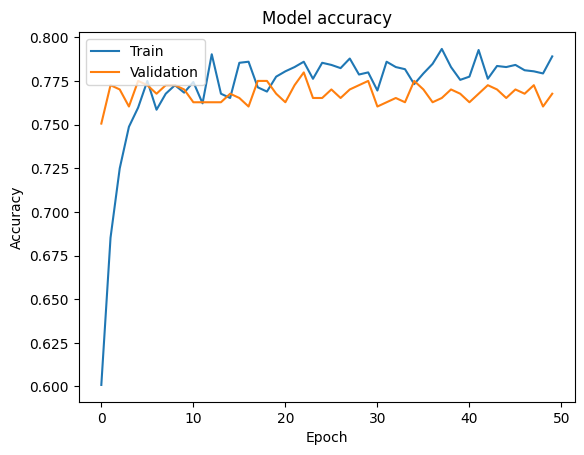

In [134]:
# Documenting metrics and decisions
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




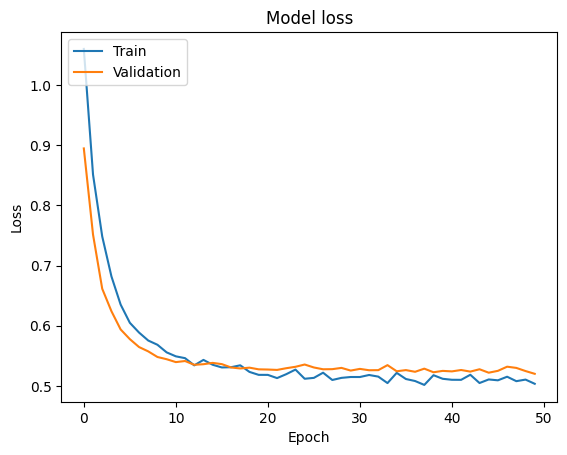

In [135]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Model turning

Base on the above parameter and training resuls that model is achieving an accuracy of approximately 60.35% on the test set, with a training accuracy of around 63.10% and a loss of 1.0940.In order to model acchivement of accuracy,to help improve model’s performance of 5 step to adjustments make as blew:

1. Hyperparameter Tuning
Learning Rate : Experiment with different learning rates. Sometimes a smaller learning rate can help the model converge to a better solution.
therefore set 0.0005.
Batch Size: Try different batch sizes. Smaller batch sizes can provide a regularizing effect and improve generalization.

2. Model Architecture
Number of Layers and Neurons: Experiment with adding more layers or increasing the number of neurons in each layer.
Activation Functions: Try using different activation functions like Leaky ReLU or ELU instead of ReLU.

3. Regularization
L2 Regularization: i already have L2 regularization, but  can try adjusting the regularization parameter.
Dropout Rate: Experiment with different dropout rates. Sometimes a lower dropout rate can help if the model is underfitting

4. Data Pre-processing
Feature Engineering: Create new features that might be more informative for the model.
Normalization: Ensure that all features are properly normalized.

5. Training Process
Epochs: Train the model for more epochs to see if the performance improves.
Early Stopping: Use early stopping to prevent overfitting. This will stop training when the validation loss stops improving.

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                     │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,473 (37.00 KB)

 Trainable params: 9,473 (37.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6540 - loss: 1.5588 - val_accuracy: 0.7889 - val_loss: 1.1745
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7488 - loss: 1.1302 - val_accuracy: 0.7864 - val_loss: 0.9254
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7643 - loss: 0.9183 - val_accuracy: 0.7965 - val_loss: 0.7836
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7744 - loss: 0.7876 - val_accuracy: 0.8015 - val_loss: 0.7022
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7921 - loss: 0.6839 - val_accuracy: 0.7990 - val_loss: 0.6464
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7897 - loss: 0.6517 - val_accuracy: 0.8040 - val_loss: 0.6130
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7786 - loss: 0.6155 - val_accuracy: 0.7940 - val_loss: 0.5860
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7852 - loss: 0.5804 - val_accu

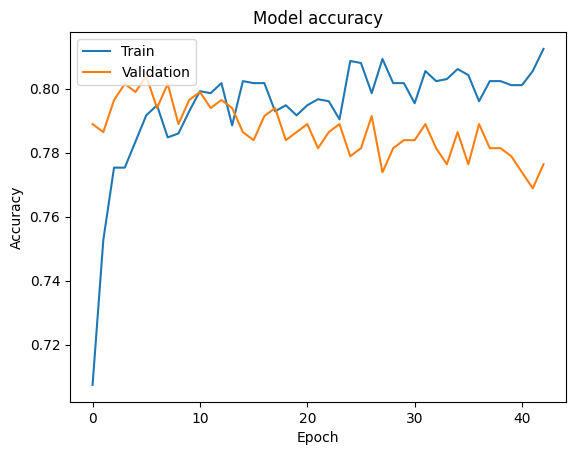

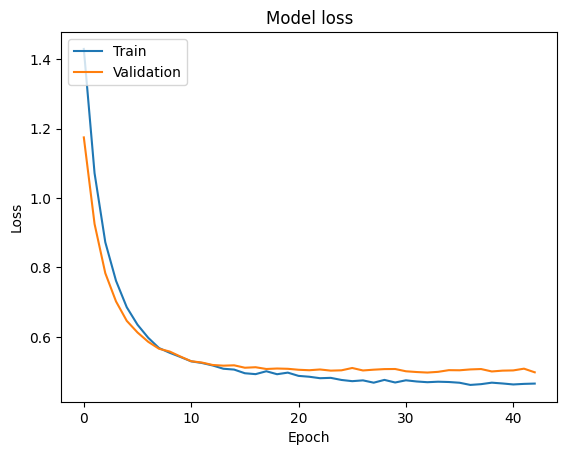

In [145]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('angmokio.csv')

# Handle missing values
data = data.dropna()

# Create a new target variable for classification
data['Rainy'] = np.where(data['Daily Rainfall Total (mm)'] > 0, 1, 0)

# Select features and target variable
X = data[['Year', 'Month', 'Day', 'Mean Temperature (°C)', 'Maximum Temperature (°C)',
          'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)']].values
y = data['Rainy'].values

# Normalize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Split the data into training and testing sets using NumPy
dataset_size = len(X)
train_size = int(dataset_size * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the input layer
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))

# Define the model with L2 regularization
model = tf.keras.Sequential([
    input_layer,
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#printing model information
model.summary()

# Compile the model
optimizer = Adam(learning_rate=0.0005)  # Adjusted learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with validation split and early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("loss:", test_loss)
print("accuracy", test_acc)

# Make predictions
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Documenting metrics and decisions
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
